# **Projeto da Disciplina (AP2)**
Gabriel Ferreira de Carvalho - 41806107 <br>
Nathalia do Valle Papst - 31919928

# Compressão de Imagens
A Compressão de Imagens é um forma de diminuir o tamanho de uma imagem, mas, mantendo a sua resolução de uma forma limpa. 


Nesse notebook nós vamos criar um compressor de imagem, usando as bibliotecas Numpy e Pillow, além disso, também usaremos a aprendizagem de máquina com o algoritmo de K-means (K-médias em português).


O K-means é um algoritmo de treinamento não supervisionado, isso é, ele rotula so dados a partir de tentativa e erro.


Bom, mas agora focando no nosso exemplo vamos começar verificando se as bibliotecas necessárias estão instaladas.

In [2]:
import PIL
import numpy

print(f'Versão do PIL/Pillow: {PIL.__version__}')
print(f'Versão do Numpy: {numpy.__version__}')


Versão do PIL/Pillow: 9.0.1
Versão do Numpy: 1.22.2


Caso não tenha instalado, adicione o seguinte código ao terminal do seu computador:

*pip3 install pillow* <br>
*pip3 install numpy*


Após isso, vamos importar as bibliotecas:

In [3]:
import os
import sys

from PIL import Image
import numpy as np

# Implementando o K-means para Compressão de Imagens
O objetivo da compressão de imagens nesse caso é reduzir o número de cores (RGB), pegando a cor média K que é mais parecida com a da imagem original. Isso é feito porque uma imagem com menos cores é uma imagem que ocupa menos espaço no disco.


Nós vamos começar implementando uma função que cria pontos iniciais para as centróides. O input da função é X, que são os exemplos de treinamento, e ela escolhe k pontos diferentes aleatoriamente.

In [4]:
def initialize_K_centroids(X, K):
    """ Escolha K pontos de X aleatoriamente """
    m = len(X)
    return X[np.random.choice(m, K, replace=False), :]

Depois nós implementamos uma função que encontra a centróide mais perto de cada exemplo de treinamento. Nós temos X e as centróides como entrada e retornamos o índice da centróide mais próxima de cada exemplo em c, que é um vetor de tamanho m.

In [5]:
def find_closest_centroids(X, centroids):
    m = len(X)
    c = np.zeros(m)
    for i in range(m):
        # Encontre distâncias
        distances = np.linalg.norm(X[i] - centroids, axis=1)

        # Atribuir cluster mais perto de c[i]
        c[i] = np.argmin(distances)

    return c

Para o próximo passo do algoritmo, nós computamos a distância de cada exemplo à sua centróide, e calculamos a média das distâncias de cada centróide. Por causa do looping que estamos fazendo pelas linhas, temos que transpor os exemplos.

In [6]:
def compute_means(X, idx, K):
    _, n = X.shape
    centroids = np.zeros((K, n))
    for k in range(K):
        examples = X[np.where(idx == k)]
        mean = [np.mean(column) for column in examples.T]
        centroids[k] = mean
    return centroids

Por fim, nós definimos o número máximo de iterações para 10. Caso as centróides não estajam mudando mais, podemos retornar o resultado porque não é possível otimizar mais.

In [7]:
def find_k_means(X, K, max_iters=10):
    centroids = initialize_K_centroids(X, K)
    previous_centroids = centroids
    for _ in range(max_iters):
        idx = find_closest_centroids(X, centroids)
        centroids = compute_means(X, idx, K)
        if (centroids == previous_centroids).all():
            # As centróides não estão mais mudando de valor.
            return centroids
        else:
            previous_centroids = centroids

    return centroids, idx

# Adicionando a Imagem
Nós vamos tentar adicionar a imagem usando a biblioteca Pillow, da seguinte forma:

In [64]:
try:
    image_path = "image.png"
    assert os.path.isfile(image_path)
except (IndexError, AssertionError):
    print('Por favor especifique uma imagem')

O Pillow nos da um objeto Imagem, mas o nosso algoritmo precisa de um vetor NumPy. Para isso, vmaos definir uma função para ajudar a converter.

In [65]:
def load_image(path):
    """ Carregue a imagem do caminho. Retorne um vetor numpy. """
    image = Image.open(path)
    return np.asarray(image) / 255

Agora, nós vamos usar essa função da seguinte forma:

In [66]:
image = load_image(image_path)
w, h, d = image.shape
print('Imagem encontrada com largura: {}, altura: {}, profundidade: {}'.format(w, h, d))

Imagem encontrada com largura: 346, altura: 346, profundidade: 3


Depois, nós pegamos a nossa matriz de recursos X. Nós vamos remodelar a imagem porque cada pixel tem o mesmo significado (cor), assim eles não precisam ser apresentados como uma grade (grid).

In [67]:
X = image.reshape((w * h, d))
K = 20 # O número de cores desejado na imagem comprimida
print(image)

[[[0.01568627 0.54509804 0.75686275]
  [0.01568627 0.55294118 0.76470588]
  [0.01960784 0.54901961 0.76470588]
  ...
  [0.01568627 0.62352941 0.81568627]
  [0.01176471 0.62352941 0.81176471]
  [0.01176471 0.62352941 0.81176471]]

 [[0.01568627 0.54901961 0.75294118]
  [0.01176471 0.54901961 0.75294118]
  [0.01568627 0.55294118 0.75686275]
  ...
  [0.01960784 0.62745098 0.81568627]
  [0.01568627 0.62745098 0.81568627]
  [0.01568627 0.62745098 0.81176471]]

 [[0.01568627 0.55294118 0.75294118]
  [0.01568627 0.55294118 0.75686275]
  [0.01176471 0.54901961 0.75294118]
  ...
  [0.01568627 0.62745098 0.81176471]
  [0.01568627 0.64313725 0.82352941]
  [0.01568627 0.63529412 0.81960784]]

 ...

 [[0.03137255 0.50196078 0.62352941]
  [0.02745098 0.53333333 0.65098039]
  [0.02745098 0.52941176 0.64313725]
  ...
  [0.20392157 0.46666667 0.5372549 ]
  [0.16078431 0.43529412 0.51372549]
  [0.16862745 0.44705882 0.51764706]]

 [[0.0627451  0.47058824 0.59607843]
  [0.0745098  0.5254902  0.64313725]


Por fim, nós podemos usar o nosso algoritmo e pegar as K cores. Essas cores serão escolhidas pelo algoritmo.

In [68]:
colors, _ = find_k_means(X, K, 20)

Pelos índices retornados pela função find_k_means estarem uma iteração para trás das cores, nós computamos os índices com a cor atual. Cada índice tem um valor de 0 até K, correspondendo à sua cor.

In [69]:
idx = find_closest_centroids(X, colors)

Depois de termos todos os dados necessários, nós reconstruiremos a imagem substituíndo o índice da cor com a cor e remodelando a imagem para suas dimensões originais. Então, usando a função Image.fromarray do Pillow, nós convertemos os números crus de volta em uma imagem.

In [71]:
idx = np.array(idx, dtype=np.uint8)
X_reconstructed = np.array(colors[idx, :] * 255, dtype=np.uint8).reshape((w, h, d))
compressed_image = Image.fromarray(X_reconstructed)

Concluíndo, nós salvamos a imagem de volta no disco da seguinte forma:

In [72]:
compressed_image.save('out.png')

# Testando a Imagem


ValueError: 'Original' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

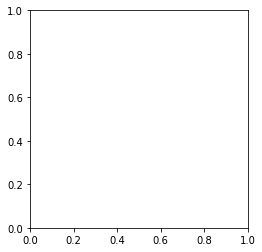

In [76]:
import matplotlib.pyplot as plt

original_image = Image.open(image_path)

plt.imshow(original_image)
plt.show()

plt.imshow(compressed_image)
plt.show()